<a href="https://colab.research.google.com/github/Iingxaki/MLA_RH/blob/main/Classification_In_class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [ ]:
# prompt: Import librarires for data handling, visualization, model training, and evaluation

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# prompt: import gradient boosting

from sklearn.ensemble import GradientBoostingClassifier


## 2. Load the titanic dataset from seaborn

In [ ]:
titanic = sns.load_dataset('titanic')

## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [ ]:
# prompt: shape of dataset

titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [ ]:
# prompt: missing values

titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

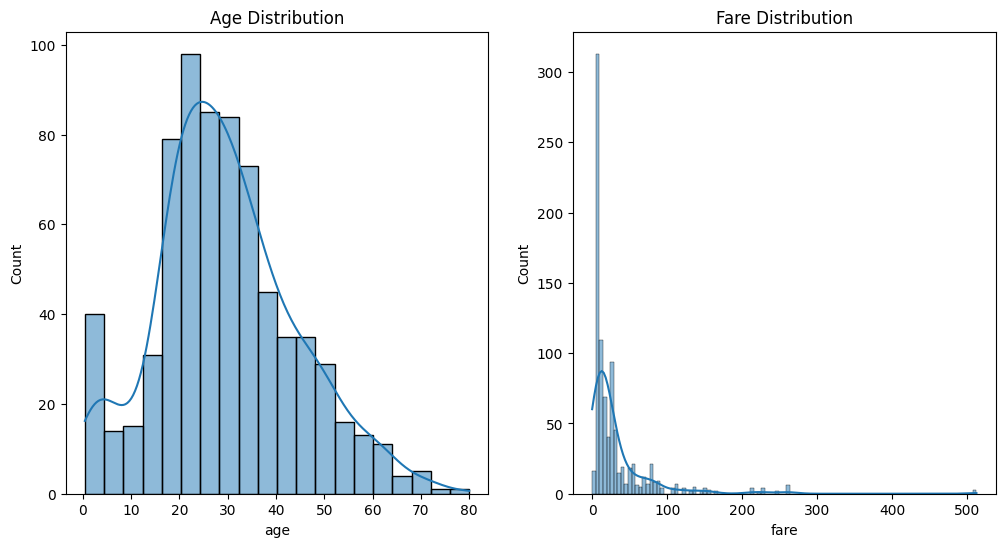

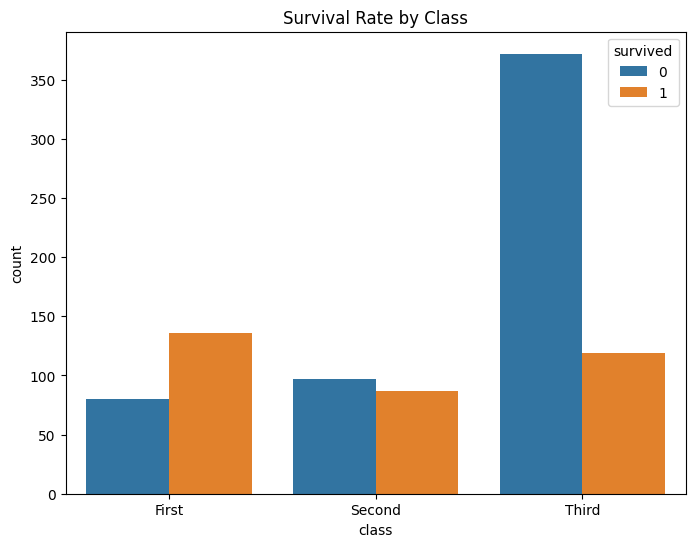

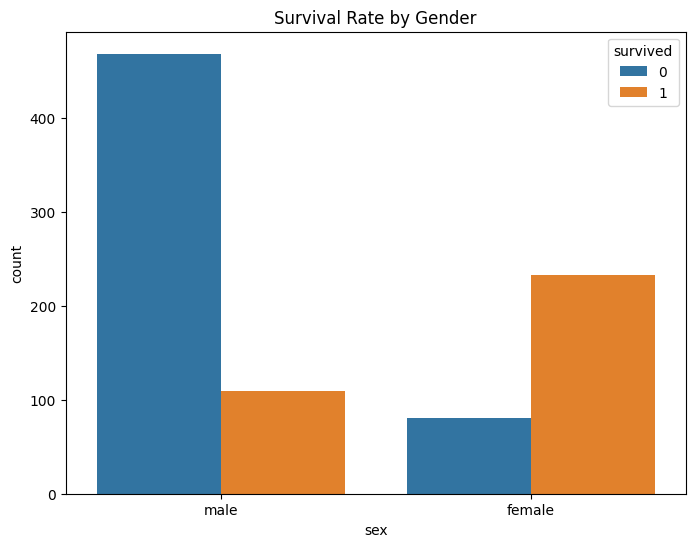

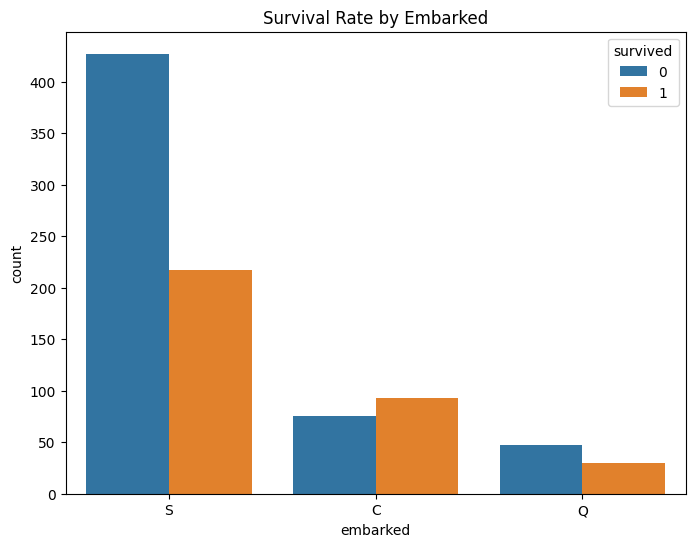

In [ ]:
# prompt: visualize the distribution of numerical features and the survival rate by different classes,gender,etc.

# Distribution of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic['age'].dropna(), kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(titanic['fare'].dropna(), kde=True)
plt.title('Fare Distribution')
plt.show()

# Survival rate by different classes
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Survival Rate by Class')
plt.show()

# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by Embarked
plt.figure(figsize=(8, 6))
sns.countplot(x='embarked', hue='survived', data=titanic)
plt.title('Survival Rate by Embarked')
plt.show()

# You can add more visualizations as needed to explore the data further.
# For example, you could visualize the relationship between age and survival,
# or the survival rate by different passenger groups (e.g., family size).

In [ ]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']




### Split the data into training and testing sets

In [ ]:
# prompt: split into training and testing sets .2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [ ]:
# prompt: split into numerical features and categorical features

numerical_features = ['age', 'fare']
categorical_features = ['pclass', 'sex', 'embarked', 'who', 'alone']

In [ ]:
# prompt: standard scaler on numerical features and one hot encoder on categorical features

# Create a ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
            ('scaler', StandardScaler())  # Scale numerical features
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_features)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the testing data (don't fit again to avoid data leakage)
X_test_processed = preprocessor.transform(X_test)

## Training data with multiple models

In [ ]:
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}



# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8156424581005587

Model: Logistic Regression
Accuracy: 0.7932960893854749

Model: Decision Tree
Accuracy: 0.7597765363128491

Model: Random Forest
Accuracy: 0.8156424581005587

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.7932960893854749

Model: Gradient Boosting
Accuracy: 0.8379888268156425


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
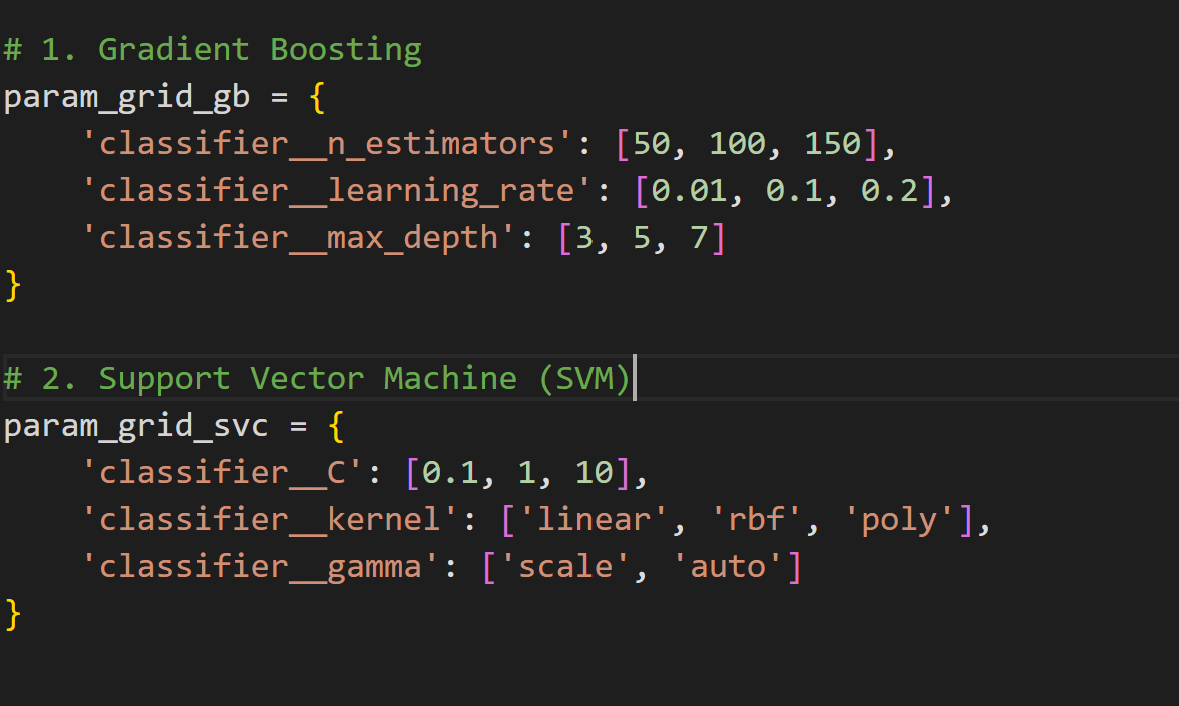

In [ ]:
# prompt: define parameter grids for gradient boosting and for K-nearest neighbors

# Gradient Boosting parameter grid
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# K-Nearest Neighbors parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

## List of models and their corresponding parameter grids
Example
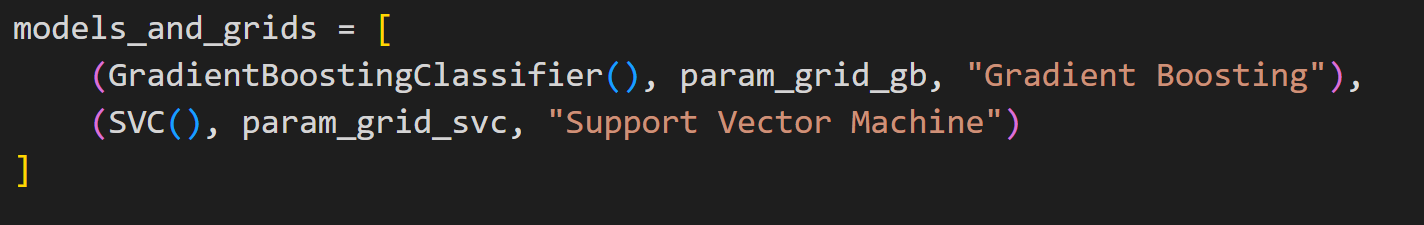

In [24]:
# prompt: list the models and their corresponding grid in models_and_grids

models_and_grids = {
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'grid': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(),
        'grid': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}
    }
}


for model_name, model_info in models_and_grids.items():
  print(f"Model: {model_name}")
  print(f"Grid: {model_info['grid']}")
  print("-" * 20)

Model: KNeighborsClassifier
Grid: {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
--------------------
Model: GradientBoostingClassifier
Grid: {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}
--------------------


In [25]:
# Loop through each model and perform GridSearchCV
for model_name, model_info in models_and_grids.items():
    model = model_info['model']
    param_grid = model_info['grid']

    # Prefix the parameter names with 'classifier__'
    # to target the parameters within the pipeline
    prefixed_param_grid = {}
    for param, values in param_grid.items():
        prefixed_param_grid[f"classifier__{param}"] = values

    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, prefixed_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for KNeighborsClassifier: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Best cross-validation accuracy for KNeighborsClassifier: 0.8019

Best parameters for GradientBoostingClassifier: {'classifier__learning_rate': 0.5, 'classifier__n_estimators': 50}
Best cross-validation accuracy for GradientBoostingClassifier: 0.8286


## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?

3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?

4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?

5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
Based on your findings, which model would you select for deployment, and why?

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.

1. Before hyperparameter tuning, Gradient Boosting has the highest accuracy score of 0.83799.
2. Gradient Boosting and KNN.
  - Gradient Boosting's tuning improved the balance between its learning rate to the number of trees, hence ptimizing performance without much overfitting.
  - KNN's tuning did help improve the distance between the weighting and number of neighbors to improve its predictions on the outcome. However, the improvement was still modest, which means it was already pretty good in the beginning.
3. Gradient Boosting 0.83799 becomes 0.8286 after finetuning. While KNN's 0.8156 becomes 0.8019 after finetuning. Both experience slight decrease in cross-validation accuracy, however, Gradient Boosting is still better.
4. Gradient Boosting's Optimal Parameters are classifier__learning_rate = 0.5, classifier__n_estimators = 50. Compared to its Default Parameters: Learning Rate = 0.1, N_estimators = 100. This shows a higher learning rate and a halving of its number of estimators to furter balance its speed and accuracy. KNN's Optimal Parameters: classifier__n_neighbors = 5, classifier__weights = distance compared to its
Default Parameters: N_neighbors = 5, Weights = 'uniform'. The optimal parameters prefer 'distance' weights over 'uniform' to give more importance to closer neighbors.
5. gradient boosting shows consistent performance between training and testing data, indicating robustness and little overfitting. But KNN experienced a slight drop in performance from training to testing data, which indicates mild overfitting. Hence, I would recommend selecting gradient boosting for deployment due to its relative robustness, minimal overfitting and consistently strong performance from training to testing data.
6. In terms of initial accuracy, hyperparameter tuning accuracy, and robustness, Gradient boosting comes out on top. It has consistently shown its edge with a model complexity that does not lead to overfitting while still capturing detailed patterns in the data.